## Loading the dataset.

In [4]:
import pandas as pd
df1 = pd.read_csv('D:\ML_Practice_Projects\Advanced\Elevator Anomaly Alert System\data\predictive-maintenance-dataset.csv')
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
 4   x1           112001 non-null  float64
 5   x2           112001 non-null  float64
 6   x3           112001 non-null  float64
 7   x4           112001 non-null  float64
 8   x5           112001 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.7 MB


,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
count,112001.000000,112001.000000,112001.000000,109563.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000
mean,56001.000000,46.275195,74.224140,28.340276,120.499335,-27.948945,0.623759,2503.994994,5509.691804
std,32332.048087,19.042179,0.684711,24.292500,18.984921,19.123796,0.258677,1874.972912,101.395621
min,1.000000,16.933000,72.399000,2.000000,90.132000,-56.353000,0.231328,286.726489,5241.615201
25%,28001.000000,29.651000,73.914000,8.000000,103.850000,-44.548000,0.399615,879.181801,5463.279396
50%,56001.000000,43.348000,74.212000,21.280000,117.640000,-31.443000,0.580561,1879.049104,5507.420944
75%,84001.000000,63.997000,74.731000,39.210000,138.119000,-10.012000,0.865330,4095.616009,5584.722361
max,112001.000000,93.744000,75.400000,100.000000,167.743000,19.745000,1.266828,8787.937536,5685.160000


In [37]:
# Checking the null values.

df1.isnull().sum()

ID                      0
revolutions             0
humidity                0
vibration            2438
x1                      0
x2                      0
x3                      0
x4                      0
x5                      0
vibration_missing       0
dtype: int64

In [36]:
df1.head()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5,vibration_missing
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001,0
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001,0
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004,0
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004,0
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004,0


In [8]:
missing_percent = df1['vibration'].isnull().mean() * 100
print(f"Missing Vibration Values: {missing_percent:.2f}%")

Missing Vibration Values: 2.18%


In [ ]:
'''The '2.18%' of the missing vibration column values cannot be
ignored/drop as it can create artificial spikes over time.'''

In [10]:
df2 = df1.copy()

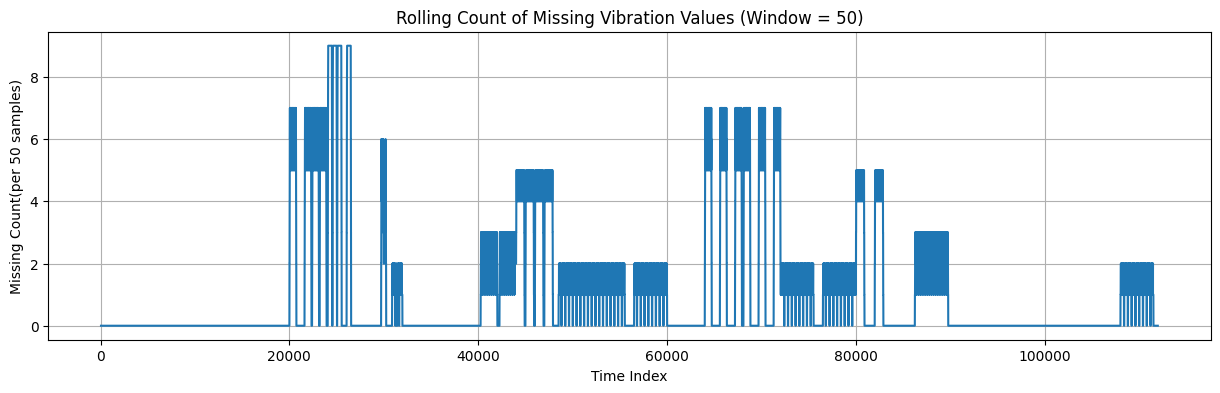

In [13]:
# Visualizing the missing vibration values over time.

import matplotlib.pyplot as plt
df1['vibration_missing'] = df1['vibration'].isnull().astype(int)

plt.figure(figsize = (15, 4))
df1['vibration_missing'].rolling(window = 50).sum().plot()
plt.title('Rolling Count of Missing Vibration Values (Window = 50)')
plt.xlabel('Time Index')
plt.ylabel('Missing Count(per 50 samples)')
plt.grid(True)
plt.show()

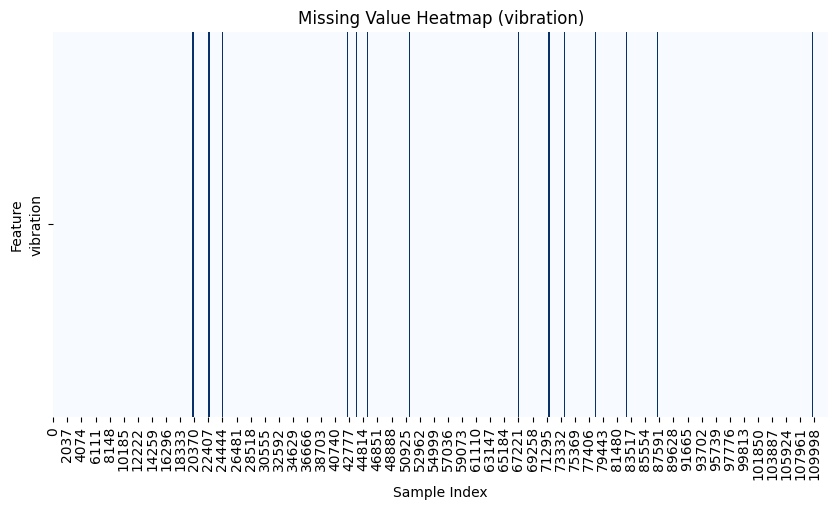

In [31]:
# Heatmap of missing values.

import seaborn as sns

plt.figure(figsize = (10, 5))
sns.heatmap(df1[['vibration']].isnull().T, cbar = False, cmap = 'Blues')
plt.title('Missing Value Heatmap (vibration)')
plt.xlabel('Sample Index')
plt.ylabel('Feature')
plt.show()

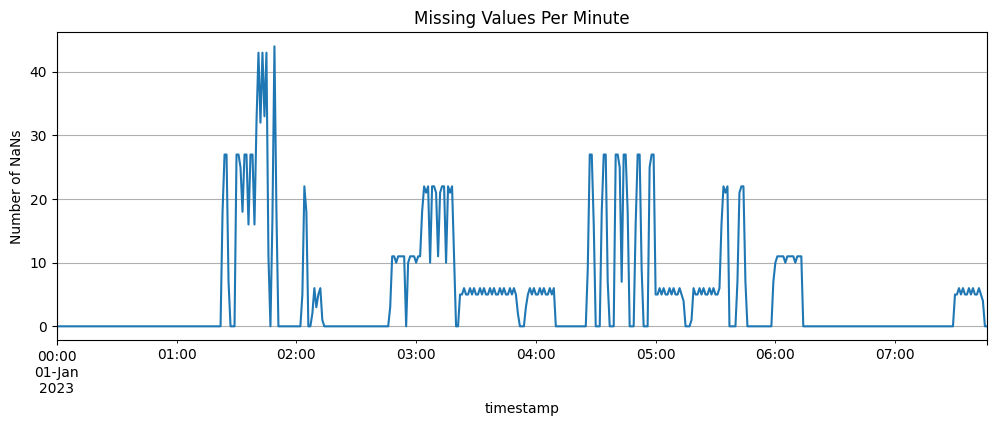

In [40]:
# Time-Based Summary
import pandas as pd

start_time = pd.Timestamp('2023-01-01 00:00:00')
sampling_interval = pd.to_timedelta(0.25, unit = 's')

df1['timestamp'] = [start_time + i * sampling_interval for i in range(len(df1))]
df1.set_index('timestamp', inplace = True)

missing_per_minute = df1['vibration'].isnull().resample('1T').sum()

missing_per_minute.plot(figsize = (12, 4), title = "Missing Values Per Minute")
plt.ylabel('Number of NaNs')
plt.grid(True)
plt.show()

In [42]:
df2.isnull().sum()

ID                0
revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64

In [44]:
df2['vibration'] = df2['vibration'].interpolate(method = 'linear', limit_direction = 'both')

In [45]:
df2.isnull().sum()

ID             0
revolutions    0
humidity       0
vibration      0
x1             0
x2             0
x3             0
x4             0
x5             0
dtype: int64

In [48]:
df2.dtypes

ID               int64
revolutions    float64
humidity       float64
vibration      float64
x1             float64
x2             float64
x3             float64
x4             float64
x5             float64
dtype: object

In [49]:
df2.head()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004
